# Digit Classification 

In this problem set, we'll explore a cannonical classification problem: recognizing hand written digits. You'll be working with a sample from the UCI ML hand-written digits dataset. This dataset has already been pre-processed: each row contains the true handwritten digit (the label) as well as a 8x8 grid indicating how dark the ink was, where 0 is white and 16 is black. You'll use this 8x8 feature grid to train a classifier which recognizes the hand-written digits. 

### A. Ensuring Correct Versions of Packages
This coding lab can be sensitive to package versioning. I have written the code using sklearn version 1.7.2, matplotlib version 3.10.7, and numpy version 2.3.4. If you are having trouble, package versioning is one thing to check. You can use uv 
```bash
!uv add "scikit-learn==1.7.2" "matplotlib==3.10.7" "numpy==2.3.4"
```
or you can use pip 
```bash
!python -m pip install -U "scikit-learn==1.7.2" "matplotlib==3.10.7" "numpy==2.3.4"
``` 


### B. Qualitative Inspection of Data 

**Instructions:**  
Generate a NumPy array named `random_indices` containing four unique random integers, each representing an index in `digits.images`.  

- Use `np.random.choice` to select four rows of the data to inspect 
- Use the length of the `digits.images` feature to give numpy a range from which to sample 
- Use the size argument to set the size of the sample
- Use the replace argument to ensure sampling without replacement 
- Assign the result to `random_indices`.  


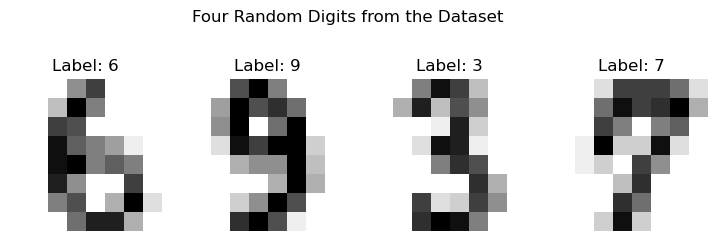

In [1]:
# Load Packages 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load digits dataset 
digits = datasets.load_digits()

# Set random seed for reproducibility 
np.random.seed(42)

# Select four random rows 
random_indices = np.random.choice(len(digits.images), size=4, replace=False) 

# Display four images from the data 
fig, axes = plt.subplots(1, 4, figsize=(9, 3))
for i, ax in enumerate(axes):
    image = digits.images[random_indices[i]]
    label = digits.target[random_indices[i]]
    
    ax.imshow(image, cmap="gray_r")  # Use 'gray_r' to fix the color inversion
    ax.set_title(f"Label: {label}")
    ax.axis("off")

plt.suptitle("Four Random Digits from the Dataset")
plt.show()


### C. Data Preprocessing and Model Tuning

**Instructions:**  
Complete the following preprocessing steps to prepare the dataset for training:
- Store the features in a matrix `X` - the features are called `images` in the `digits` dataset 
- Store the labels in a vector `y` - the labels are called `target` in the `digits` dataset 
- Implement a train/test split:
    - Assign 20% of the data to testing 
    - Call the samples X_train, X_test, y_train, y_test 
- For the complexity hyperparameter C, test 5 values in the `param_grid`: 0.001, 0.01, 0.1, 1, 10, 100
- Use cross-validation to find the best value of C:
    - Instantiate a GridSearchCV model, and assign it to `logistic_crossvalidation' 
    - Pass an instance of Logistic Regression using the arguments `max_iter=100` and `solver="lbfgs"` to the GridSearchCV model
    - Pass the param_grid to the GridSearchCV model
    - Use 5-fold cross validation 
- Fit the `logistic_crossvalidation` model using the **standardized** training data.  

In [2]:
# Flatten images to vectors and store in digits.images
digits.images = digits.images.reshape((len(digits.images), -1))

# Assign Feature and Labels 
X = digits.images
y = digits.target

# Test/Train Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features 
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

# 5-Fold Cross-Validation to Tune C 
param_grid = {'C': [0.1, 1, 10, 100]}
logistic_crossvalidation = GridSearchCV(LogisticRegression(max_iter=100, solver="lbfgs"), param_grid, cv=5)
logistic_crossvalidation.fit(X_train_standard, y_train)

# Save Best C 
best_C = logistic_crossvalidation.best_params_["C"]
print(f"Best regularization parameter (C): {best_C}")



Best regularization parameter (C): 1


### D. Model Training and Predictions 

**Instructions**
1. Instantiate a Logistic Regression classifier 
    - The C argument should be set to the best_C, found previously via cross-validation 
    - Assign the classifier to `logistic_classifier' 
2. Fit the Logistic Classifier 
    - use `X_train_standard` and `y_train` 
3. Make Predictions
    - use the trained model to predict labels for `X_test_standard` and store the results in `y_pred` 

In [3]:
# Train Model 
logistic_classifier = LogisticRegression(C=best_C, max_iter=100, solver="lbfgs")
logistic_classifier.fit(X_train_standard, y_train)

# Make Predictions
y_pred = logistic_classifier.predict(X_test_standard)

### E. Predictions and Performance Evaluation
**Instructions**
1. Compute the model’s accuracy using a call to the `accuracy_score(__,__)` function.
    - `accuracy_score`  takes the actual and predicted values of y as arguments 
2. Compute additional measures of the model's accuracy using the `classification_report(__,__)` function. 
    - `classification_report` takes actual and predicted values of y as arguments 
    
**Interpreting the Confusion Matrix:**  
- The diagonal elements represent correctly classified instances.  
- Off-diagonal elements show misclassified instances (where the predicted label differs from the true label).  
- Darker blue shades indicate higher values, meaning more predictions fell into that category.  
- Ideally, most values should be on the diagonal, indicating good classification performance.  


Accuracy: 0.9722
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



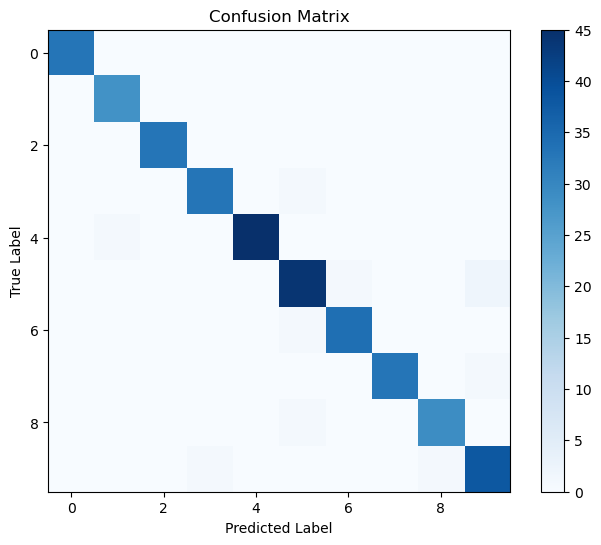

In [4]:
# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix(y_test, y_pred), cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### F. Qualitative Inspection of Predictions 

1. Use `np.where` to find indices examples where the model succeeded and failed, and call these objects `correct_indices` and `incorrect_indices`.  
    - the model succeeded when the predicted y equals the true label
    - the model failed when the predicted y does not equal the true label 
2. Use `np.random.choice` to sample 3 successful prediction indices from `correct_indices` as well as 3 unsuccessful predictions from `incorrect_indices`. Call these `correct_samples` and `incorrect_samples`. 

3. Take a look at the correctly classified and misclassified samples. Focusing on the misclassified examples, why do you think the model mislabeled these instances? 


One of the reasons why those cases failed is that the color of the written line differs greatly, from a faint grey to a black color. This could mess up the prediction, and another reason I see is that the numbers are only 8x8 so some of the details that you would see in a higher resolution writing would esentially be left out of the picture and therefore left out of the LogisticRegression prediction model. Another reason for the mislabelling is the similarities of the number such as a 5 and 6 and in the case I saw is the 9 and 3 since it has that curve on the bottom, and a rounded shape on top and bottom.

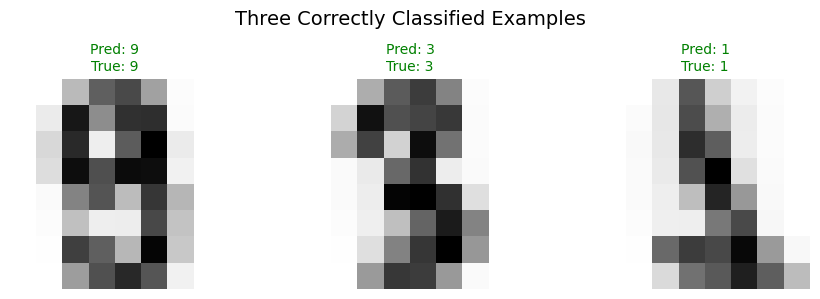

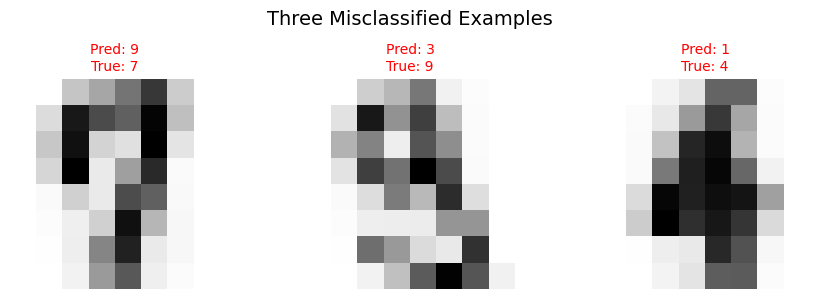

In [9]:
# Reverse standardization for visualization
X_test_original = scaler.inverse_transform(X_test)

# Find correctly and incorrectly classified examples
correct_indices = np.where(y_pred == y_test)[0]
incorrect_indices = np.where(y_pred != y_test)[0]

# Select three random correct and incorrect examples
correct_samples = np.random.choice(correct_indices, size=3, replace=False) 
incorrect_samples = np.random.choice(incorrect_indices, size=3, replace=False)

# Function to plot images 
def plot_images(indices, title, color):
    fig, axes = plt.subplots(1, 3, figsize=(9, 3))
    for i, ax in enumerate(axes):
        index = indices[i]
        ax.imshow(X_test_original[index].reshape(8, 8), cmap="gray_r") 
        ax.set_title(f"Pred: {y_pred[index]}\nTrue: {y_test[index]}", fontsize=10, color=color)
        ax.axis("off")
    
    plt.tight_layout()  
    plt.subplots_adjust(top=0.75)  
    plt.suptitle(title, fontsize=14)
    plt.show()

# Plot correct and incorrect predictions
plot_images(correct_samples, "Three Correctly Classified Examples", "green")
plot_images(incorrect_samples, "Three Misclassified Examples", "red")


Transcript for Coding Lab 4 https://gemini.google.com/share/287de1d49d46